### Problem Statement

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

**Import Necessary Libraries**

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the dataset and display the first few rows to understand its structure.
2. Check for any missing values in the dataset and handle them appropriately.
3. Visualize the class distribution to identify any class imbalance in the dataset.
4. Encoding categorical variables using one-hot encoding for the following columns: `age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`.

In [2]:
# Step 1: Import the dataset and display the first few rows

df = pd.read_csv("breast_cancer_data.csv")
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [3]:
# Step 2: Check for any missing values in the dataset and handle them appropriately

df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

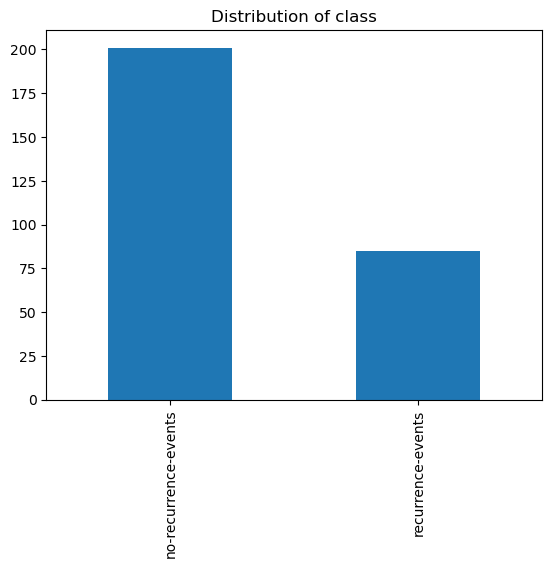

In [6]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset

df['class'].value_counts().plot(kind="bar")
plt.title("Distribution of class")
plt.show()

In [7]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.

en = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
df = pd.get_dummies(df,columns=en, drop_first=True)
df.head()

,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,no-recurrence-events,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,no-recurrence-events,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,no-recurrence-events,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,no-recurrence-events,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [8]:
df.keys()

Index(['deg-malig', 'class', 'age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_09-May', 'tumor-size_14-Oct', 'tumor-size_15-19',
       'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34',
       'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49',
       'tumor-size_50-54', 'inv-nodes_05-Mar', 'inv-nodes_08-Jun',
       'inv-nodes_11-Sep', 'inv-nodes_14-Dec', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'node-caps_yes', 'breast_right',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_yes'],
      dtype='object')

### Task 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [32]:
# Step 1: Split the dataset into training and test sets

X = df.drop('class', axis=1)
y = df['class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [33]:
y_train.value_counts()

no-recurrence-events    160
recurrence-events        68
Name: class, dtype: int64

In [34]:
# Step 2: Train a Logistic Regression model using the training data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        41
   recurrence-events       0.50      0.29      0.37        17

            accuracy                           0.71        58
           macro avg       0.62      0.59      0.59        58
        weighted avg       0.68      0.71      0.68        58



### Task 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [36]:
# Step 1: Apply undersampling to balance the classes in the training data

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)

In [37]:
y_train_rus.value_counts()

no-recurrence-events    68
recurrence-events       68
Name: class, dtype: int64

In [38]:
# Step 2: Train a Logistic Regression model using the undersampled training data

from sklearn.linear_model import LogisticRegression
model_rus = LogisticRegression()
model_rus.fit(X_train_rus,y_train_rus)

LogisticRegression()

In [39]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score

y_pred_rus = model_rus.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_rus)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.54      0.65        41
   recurrence-events       0.39      0.71      0.50        17

            accuracy                           0.59        58
           macro avg       0.60      0.62      0.57        58
        weighted avg       0.69      0.59      0.60        58



### Task 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [40]:
# Step 1: Apply SMOTE to balance the classes in the training data

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [41]:
y_train_smote.value_counts()

recurrence-events       160
no-recurrence-events    160
Name: class, dtype: int64

In [42]:
# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data

from sklearn.linear_model import LogisticRegression
model_smote = LogisticRegression()
model_smote.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [43]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score

y_pred_smote = model_smote.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_smote)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58



### Task 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [44]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data

from imblearn.combine import SMOTETomek
tomek = SMOTETomek(random_state=42)
X_train_tomek,y_train_tomek = tomek.fit_resample(X_train,y_train)

In [45]:
y_train_tomek.value_counts()

recurrence-events       148
no-recurrence-events    148
Name: class, dtype: int64

In [46]:
# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data

from sklearn.linear_model import LogisticRegression
model_tomek = LogisticRegression(max_iter=2000)
model_tomek.fit(X_train_tomek,y_train_tomek)

LogisticRegression(max_iter=2000)

In [47]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score

y_pred_tomek = model_tomek.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_tomek)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58

